# Learning Objectives
- Evaluate performance of the selected model.
- Use k-fold cross validation to compare the performance of a pair of models.
-  Use repeated k-fold cross validation to compare the performance of a pair of models.

In [171]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

data = pd.read_csv('Secom.csv')
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, Sensor 1 to Target
dtypes: float64(122), int64(1), object(468)
memory usage: 7.1+ MB
None


/var/folders/mp/s3t18scd1pvck503vkmczpjw0000gn/T/ipykernel_91163/972448667.py:5: DtypeWarning: Columns (0,8,9,10,11,12,14,15,16,17,18,19,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,43,44,45,46,47,48,50,51,53,54,55,56,57,58,75,76,77,78,79,80,81,82,83,89,90,92,93,103,104,118,136,144,145,146,147,148,150,151,152,153,154,155,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,180,181,182,183,184,185,187,188,190,191,192,193,194,195,210,211,212,213,214,215,216,217,218,224,225,227,228,238,239,253,270,271,279,280,281,282,283,285,286,287,288,289,290,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,316,317,318,319,320,321,323,324,326,327,328,329,330,331,348,349,350,351,352,353,354,355,356,362,363,365,366,376,377,391,408,409,417,418,419,420,421,423,424,425,426,427,428,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,452,453,454,455,456,457,459,460,462,463,464,465,466,467,482,483,484,485,486,487,488,489,490,496,497,499,500,5

,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,...,Sensor 582,Sensor 583,Sensor 584,Sensor 585,Sensor 586,Sensor 587,Sensor 588,Sensor 589,Sensor 590,Target
0,3030.93,2564,2187.7333,1411.1265,1.3602,100,97.6133,0.1242,1.5005,0.0162,...,!,0.5005,0.0118,0.0035,2.363,!,!,!,!,1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.006,208.2045,1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,0
3,2988.72,2479.9,2199.0333,909.7926,1.3204,100,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.499,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,1
4,3032.24,2502.87,2233.3667,1326.52,1.5334,100,100.3967,0.1235,1.5031,-0.0031,...,!,0.48,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,1


Question 1.1: Detect and replace missing values in the data with np.nan . Hint: missing data is noted as !

In [172]:
# Just using the "replace" method from the DataFrame is enough. Replacing in place.
data.replace('!', np.nan, inplace=True)

Question 1.2 Confirm that the change has worked

In [173]:
print(f"How many NaNs are there? {data.isna().sum().sum()}")
print(f"How many '!' are there? {data.eq('!').sum().sum()}")

How many NaNs are there? 41951
How many '!' are there? 0


Question 1.3: Fill the missing values with zeroes

In [174]:
# Just using the "fillna", replacing in place.
data.fillna(0, inplace=True)

In [175]:
#Validate that the missing values were replaced
print(f"There are {data.isnull().sum().sum()} nulls")

There are 0 nulls


Question 2.1: Split the data into Training and testing. Make your test size = 0.2 and your random_state = 42.

In [176]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Splitting the dataset into features and target
y = data['Target']
X = data.drop('Target', axis=1)

# We need to scale the data. The features generally look like floats, with ~1500 entries it 
# should be safe to utilize the standarization, i.e. x - mean(x) / std(x).
# sklearn does it for us.
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



Question 2.2: Fit a logistic regression model on the training data. Predict the test data and plot the ROC curve

In [177]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [178]:
y_pred = logistic_regression.predict(X_test)

Plot ROC Curve

[[  5  22]
 [ 19 268]]
              precision    recall  f1-score   support

           0       0.19      0.21      0.20        24
           1       0.93      0.92      0.93       290

    accuracy                           0.87       314
   macro avg       0.56      0.57      0.56       314
weighted avg       0.88      0.87      0.87       314

AUC: 0.6846264367816092


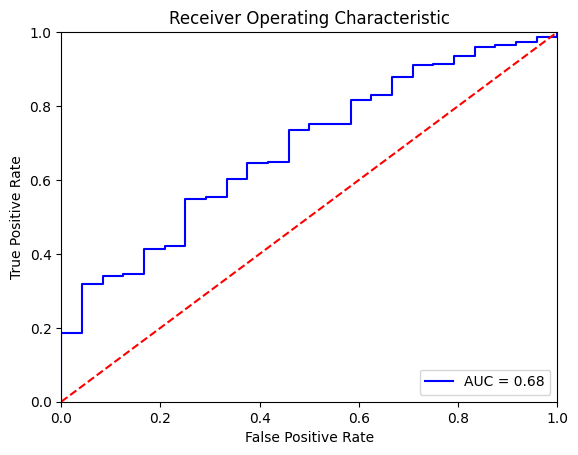

In [179]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# First let's take a look at the confusion matrix and diagnostics.
print(confusion_matrix(y_pred, y_test))
# [[  5  19]
#  [ 22 268]]
# TN = 5, FP = 19, FN = 22, TP = 268
# Precision = TP / (TP + FP) = 268 / (268 + 19) = 0.93
# Recall = TP / (TP + FN) = 268 / (268 + 22) = 0.92
# OR
# For P(X=0) 
# [[ 268  22]
# [ 19 5]]
# TN = 268, FP = 22, FN = 19, TP = 5
# Precision = TP / (TP + FP) = 5 / (5 + 22) = 0.19
# Recall = TP / (TP + FN) = 5 / (5 + 19) = 0.21

print(classification_report(y_test, y_pred))
#               precision    recall  f1-score   support

#            0       0.19      0.21      0.20        24
#            1       0.93      0.92      0.93       290

#     accuracy                           0.87       314
#    macro avg       0.56      0.57      0.56       314
# weighted avg       0.88      0.87      0.87       314

# F1-score looks pretty good at 0.87. Looks like there is some imbalance between classes though.

# calculate the fpr and tpr for all thresholds of the classification
probs = logistic_regression.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Question 2.2: Apply RFE with a logistic regression model on the training data testing out different number of features. Predict the test data and plot the ROC curve.

In [180]:
from sklearn.feature_selection import RFE

rfe_estimator = LogisticRegression()

# I really didn't want to wait, so opened the notebook in google collab.
# selector = RFE(rfe_estimator, n_features_to_select=500, step=1)
# AUC=0.68
# selector = RFE(rfe_estimator, n_features_to_select=400, step=10)
# AUC=
# selector = RFE(rfe_estimator, n_features_to_select=10, step=50)
# AUC=0.62
# I don't know why, but in Google Collab the auc is actually better, 
# at 150 features with step 30, the auc is 0.70.
selector = RFE(rfe_estimator, n_features_to_select=150, step=30)
# AUC=0.70!

selector = selector.fit(X_train, y_train)


In [181]:
y_pred = selector.predict(X_test)

Plot ROC Curve

AUC: 0.6844827586206896


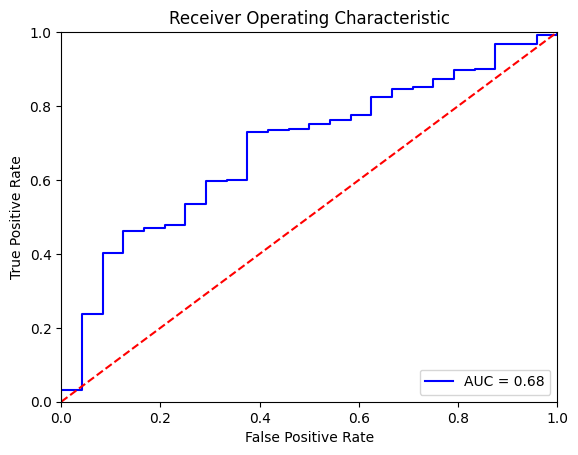

In [182]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = selector.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Question 3.1: Apply stratisfied tain test split to account for class imbalance

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.2)

Question 3.2: Apply RFE with a logistic regression model on the stratisfied training data testing out different number of features. Predict the test data and plot the ROC curve.

In [188]:
stratified_rfe = RFE(LogisticRegression(), n_features_to_select=150, step=30)
stratified_rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=150, step=30)

AUC: 0.5962944904924428


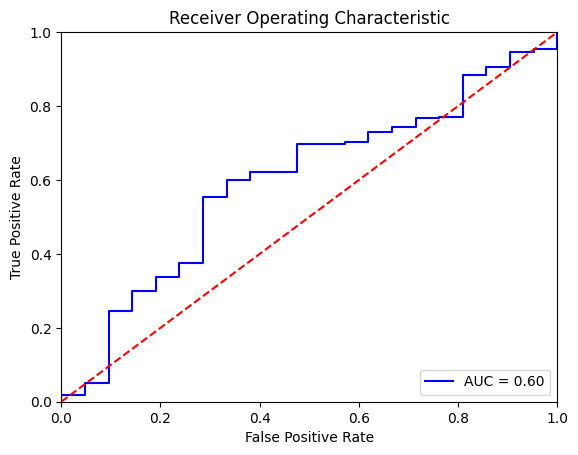

In [189]:
%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = stratified_rfe.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Question 4.1: Apply stratisfied K-Fold split where K=5 to the above data 

In [208]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict

skf = StratifiedKFold(n_splits=5)



Implement the model and then create the ROC Curve

Accuracy: 76.62% (13.75%)
AUC: 0.8645045045045046


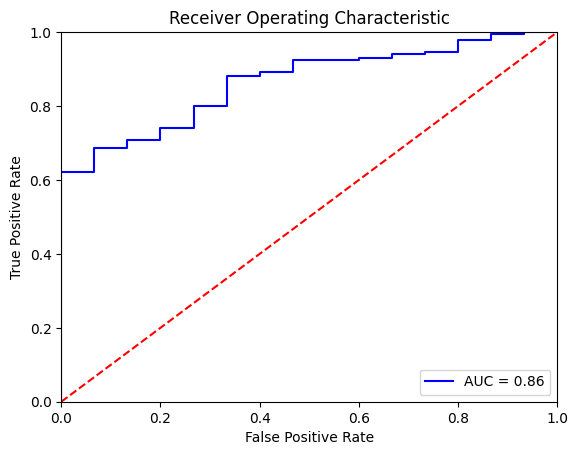

In [212]:
# Plot the ROC curve

model = LogisticRegression(max_iter=1000)
results = cross_val_score(model, X_train, y_train, cv=skf)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100.0, results.std()*100.0))

probs = cross_val_predict(model, X_test, y_test, method='predict_proba')
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)
print("AUC: {}".format(roc_auc))

# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


Question 4.2: Summarize your findings of all above models

The model predicted with the 5 folds turned out to be significantly better than the models build without cross-validation. With the RFE I was able to find a model that reached 0.70 AUC, while the model without RFE reached 0.68 AUC. The model with the RFE and the 5 folds reached 0.86 AUC.

<h3> Question 5. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

I had no prior experience with cross-validation and I didn't have any particular expectations when starting this assignment. I was surprised to see how much the model improved when using k-fold validation. I had some trouble with the RFE, but I was able to solve it by using the correct parameters. I think that the most important part of this assignment was to understand the importance of cross-validation and how it can improve the model. I think that I need to learn more about the different parameters that can be used in the RFE and how to use them to improve the model.
I'm still not sure if I used the `cross_val` function correctly. Looks like the `cross_val_score` function just estimates the scores of the estimator, but doesn't actually perform the fitting - when I tried obtaining the coefficients of the model, I got an error. I think I need to learn more about how to use the `cross_val` function and how to use the RFE to improve the model.